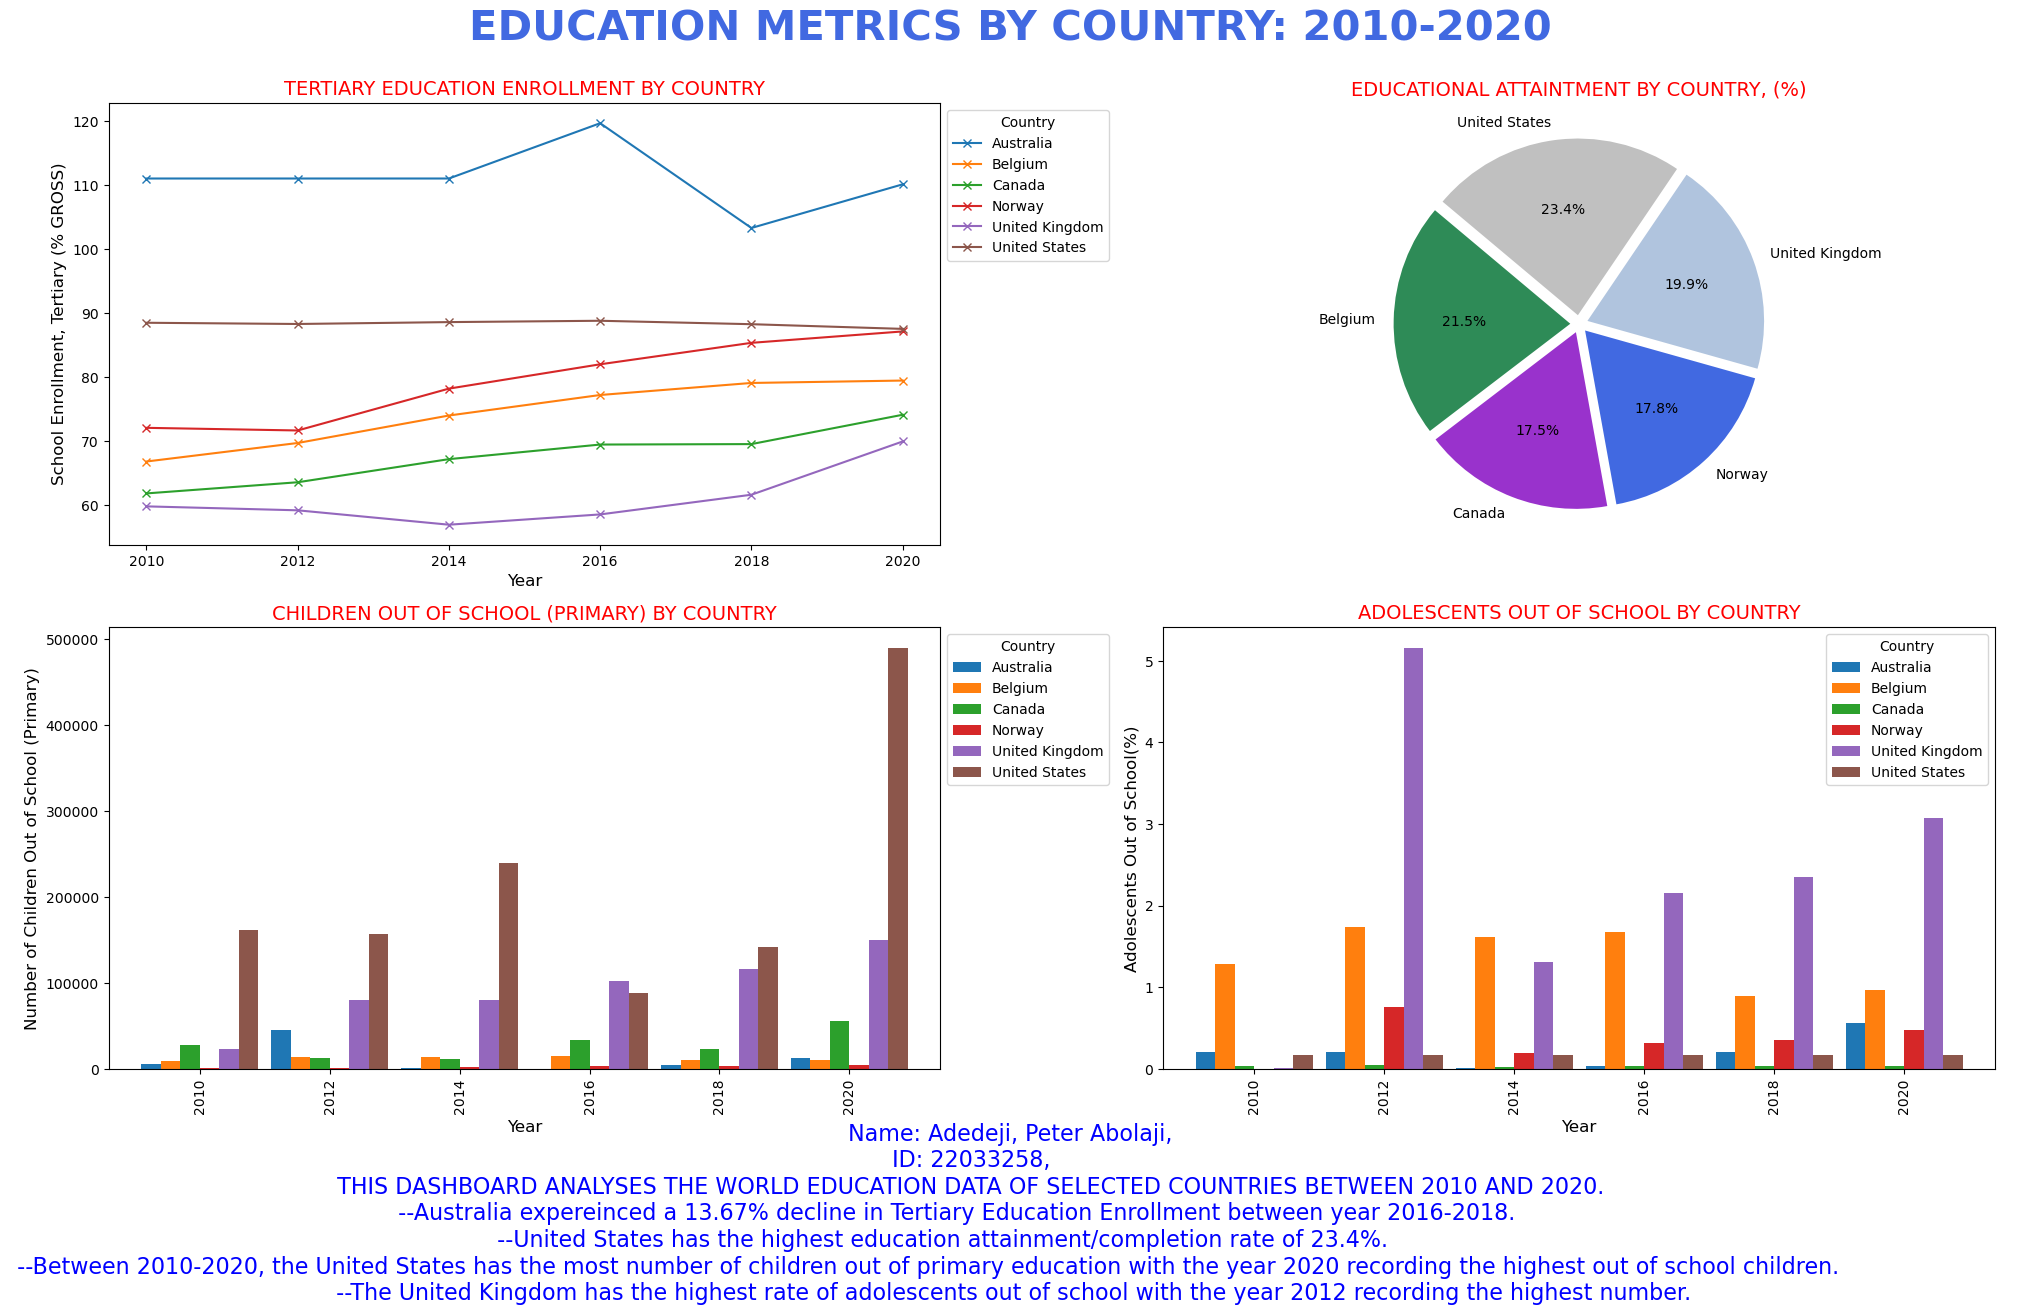

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
edu = pd.read_csv('world data.csv')

# First plot
# Create DataFrame for tertiary school enrollment
tertiary_enrollment = edu[edu['Series Name'] ==\
                          'School enrollment, tertiary (% gross)']

# Set the Country Name as index
tertiary_enrollment.set_index('Country Name', inplace=True)

# Transpose the DataFrame for easier plotting
tertiary_enrollment = tertiary_enrollment.transpose()

# Convert data to numeric, excluding non-numeric values
tertiary_enrollment = tertiary_enrollment.apply(pd.to_numeric, errors='coerce')


# Second plot
# Create DataFrame for educational attainment (adjust if needed)
edu_attainment = edu[edu['Series Name'] ==\
                     "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"]

# Set the Country Name as index
edu_attainment.set_index('Country Name', inplace=True)

# Transpose the DataFrame for easier plotting
edu_attainment = edu_attainment.transpose()

# Convert the data to numeric, excluding non-numeric values
edu_attainment = edu_attainment.apply(pd.to_numeric, errors='coerce')

# Drop 'Country Code' and 'Series Name' columns
edu_attainment.drop(['Country Code', 'Series Name'], inplace=True)

# Customize colors & gaps between pie parts
colors = ['seagreen', 'darkorchid', 'royalblue', 'lightsteelblue', 'silver',\
          'sandybrown']
# Create explode list of 0s same length as columns
explode = [0.05]*len(edu_attainment.columns)


# Third plot
# Create DataFrame for children out of school in primary education
children_out_of_school = edu[edu['Series Name'] ==\
                             'Children out of school, primary']

# Set the Country Name as index
children_out_of_school.set_index('Country Name', inplace=True)

# Transpose the DataFrame for easier plotting
children_out_of_school = children_out_of_school.transpose()

# Convert the data to numeric, excluding non-numeric values
children_out_of_school = children_out_of_school.apply(\
    pd.to_numeric, errors='coerce')

# Drop columns
children_out_of_school.drop(['Country Code', 'Series Name'], inplace=True)


# Fourth plot
# Create DataFrame for adolescents out of school
adolescents_out_of_school = edu[edu['Series Name'] ==\
                                'Adolescents out of school (% of lower secondary school age)']

# Set Country Name as the index
adolescents_out_of_school.set_index('Country Name', inplace=True)

# Transpose the DataFrame for easier plotting
adolescents_out_of_school = adolescents_out_of_school.transpose()

# Convert the data to numeric, excluding non-numeric values
adolescents_out_of_school = adolescents_out_of_school.apply(\
    pd.to_numeric, errors='coerce')

# Drop columns
adolescents_out_of_school.drop(['Country Code', 'Series Name'], inplace=True)


# Create a dashboard with all plot using plt.subplots
# Create a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# First plot - Tertiary Education Enrollment by Country
tertiary_enrollment.plot(kind='line', marker='x', ax=axes[0, 0])
axes[0, 0].set_title('TERTIARY EDUCATION ENROLLMENT BY COUNTRY', fontsize=14, color='red')
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('School Enrollment, Tertiary (% GROSS)', fontsize=12)
axes[0, 0].legend(title='Country', bbox_to_anchor=(1, 1))

# Second plot - Educational Attainment Pie Chart
axes[0, 1].pie(edu_attainment.iloc[0], labels=edu_attainment.columns,
               colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title("EDUCATIONAL ATTAINTMENT BY COUNTRY, (%)", fontsize=14, color='red')

# Third plot - Children Out of School Bar Chart
children_out_of_school.plot(kind='bar', width=0.9, ax=axes[1, 0])
axes[1, 0].set_title('CHILDREN OUT OF SCHOOL (PRIMARY) BY COUNTRY',fontsize=14, color='red')
axes[1, 0].set_xlabel('Year', fontsize=12)
axes[1, 0].set_ylabel('Number of Children Out of School (Primary)', fontsize=12)
axes[1, 0].legend(title='Country', bbox_to_anchor=(1, 1))

# Fourth plot - Adolescents Out of School Bar Chart
adolescents_out_of_school.plot(kind='bar', width=0.9, ax=axes[1, 1])
axes[1, 1].set_title('ADOLESCENTS OUT OF SCHOOL BY COUNTRY',fontsize=14, color='red')
axes[1, 1].set_xlabel('Year', fontsize=12)
axes[1, 1].set_ylabel('Adolescents Out of School(%)', fontsize=12)
axes[1, 1].legend(title='Country', bbox_to_anchor=(1, 1))

# Create overall title
plt.suptitle('EDUCATION METRICS BY COUNTRY: 2010-2020', fontsize=30,
             fontweight='bold', color='royalblue')

# Add text below the plots
plt.figtext(0.5, 0.01, '\n\n\n Name: Adedeji, Peter Abolaji \n ID: 22033258,\
            \n THIS DASHBOARD ANALYSES THE WORLD EDUCATION DATA OF SELECTED COUNTRIES BETWEEN 2010 AND 2020.\
            \n --Australia expereinced a 13.67% decline in Tertiary Education Enrollment between year 2016-2018.\
                \n --United States has the highest education attainment/completion rate of 23.4%.\
                    \n --Between 2010-2020, the United States has the most number of children out of primary education with the year 2020 recording the highest out of school children.\
                        \n --The United Kingdom has the highest rate of adolescents out of school with the year 2012 recording the highest number.',\
            ha='center', va='center', fontsize=16, color='blue')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Show plot
plt.show()
